In [26]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# EXPLORATORY DATA ANALYSIS

In [28]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [29]:
train_df.sample(5)         # 1-Positive 0-Negative

,id,label,tweet
1937,1938,0,ofcourse they'll ðððâ¤ððð
14774,14775,0,worksite at boronia!! #working #longtimes
380,381,0,well i was gonna go see adtr with bae...
341,342,0,@user it's @user #iampossible today! #extraor...
15263,15264,0,remembering to focus on the simplest happy mom...


In [30]:
test_df.head(5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [31]:
train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [32]:
test_df.isnull().sum()

id       0
tweet    0
dtype: int64

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


Text(0.5, 1.0, 'Number of Positive and Negative Tweets')

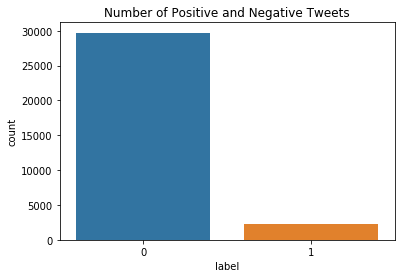

In [35]:
sns.countplot(data = train_df, x = 'label' )
plt.title('Number of Positive and Negative Tweets')


### Remove Punctuations

In [36]:
def removePunctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text

In [37]:
train_df['tweet'] = train_df["tweet"].apply(removePunctuation)
test_df['tweet'] = test_df["tweet"].apply(removePunctuation)

In [38]:
train_df.head(5)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [39]:
test_df.head(5)

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


### Remove Stopwords

In [40]:
import nltk
from nltk.corpus import stopwords
useless_words = stopwords.words('english')

In [41]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (useless_words)]))
test_df['tweet'] = test_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (useless_words)]))

In [42]:
train_df.head(5)

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urð± ðððð...
4,5,0,factsguide society motivation


### Remove Non Printable Characters

In [43]:
import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

train_df['tweet'] = train_df['tweet'].apply(lambda x: replace_foreign_characters(x))
test_df['tweet'] = test_df['tweet'].apply(lambda x: replace_foreign_characters(x))


In [44]:
train_df.head(5)

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [45]:
train_df.sample(4)

,id,label,tweet
1390,1391,0,sad
28833,28834,1,user user user unbelievable aicle tip never ok...
4964,4965,0,wowfinally see user southcitymall felling wait...
2811,2812,0,know today going shitty yolo umbrella weather ...


### Remove Unwanted Expressions

In [46]:
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a

train_df.tweet = train_df.tweet.apply(clean)
test_df.tweet = test_df.tweet.apply(clean)

### Remove Hyperlinks

In [47]:
train_df['tweet'] = train_df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
test_df['tweet'] = test_df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

### Lammetization 

In [48]:
import nltk
from nltk.stem import WordNetLemmatizer 
w = WordNetLemmatizer()
train_df.tweet = train_df.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
train_df.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thank lyft credit cant use cause don...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


## TFIDF Vectorization

In [57]:
X = train_df.drop('label', axis = 1)
y = train_df['label']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)


In [49]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vec= tfid.fit_transform(train_df.tweet)
vec.shape

(31962, 38190)

In [51]:
features = tfid.get_feature_names()

In [53]:
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state = 42)
g,h=s.fit_sample(vec,train_df.label)

In [55]:
print(g.shape)
print(h.shape)

(59440, 38190)
(59440,)


In [56]:
pd.Series(h).value_counts()

1    29720
0    29720
Name: label, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(g,h,test_size = 0.3)

In [60]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [61]:
y_pred = bnb.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy" , accuracy_score(y_pred, y_test))
print("Precision" , precision_score(y_pred, y_test))
print("f1 Score" , f1_score(y_pred, y_test))
print("Recall" , recall_score(y_pred, y_test))

Accuracy 0.9655675190668461
Precision 0.9783898779531968
f1 Score 0.9660585959093422
Recall 0.954034283218692
